<a href="https://colab.research.google.com/github/swastik6154/AQI-prediction-using-ML-Python/blob/main/prediction_of_pm10_of_khandagiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/khandagiri data.csv')
df.head()


,ds,y
0,2022-01-04,172.0
1,2022-01-06,187.0
2,2022-01-10,146.0
3,2022-01-12,127.0
4,2022-01-18,181.0


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptw1iseqt/nw4vb2m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptw1iseqt/zqrv_erc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71451', 'data', 'file=/tmp/tmptw1iseqt/nw4vb2m4.json', 'init=/tmp/tmptw1iseqt/zqrv_erc.json', 'output', 'file=/tmp/tmptw1iseqt/prophet_modelry3bbpl6/prophet_model-20240222202744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1460)
future.tail()

,ds
1883,2026-10-26
1884,2026-10-27
1885,2026-10-28
1886,2026-10-29
1887,2026-10-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1883,2026-10-26,156.948359,95.272817,214.535757
1884,2026-10-27,159.790193,99.518345,213.576462
1885,2026-10-28,162.204508,102.341537,219.380108
1886,2026-10-29,163.914036,102.359198,216.732190
1887,2026-10-30,167.444564,106.031449,223.262404


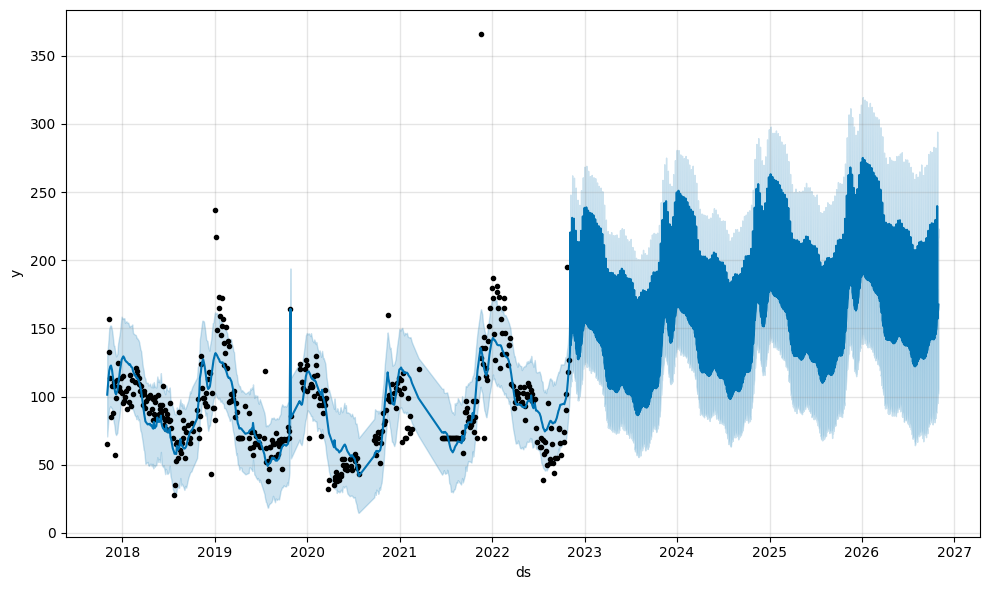

In [ ]:
fig1 = m.plot(forecast)



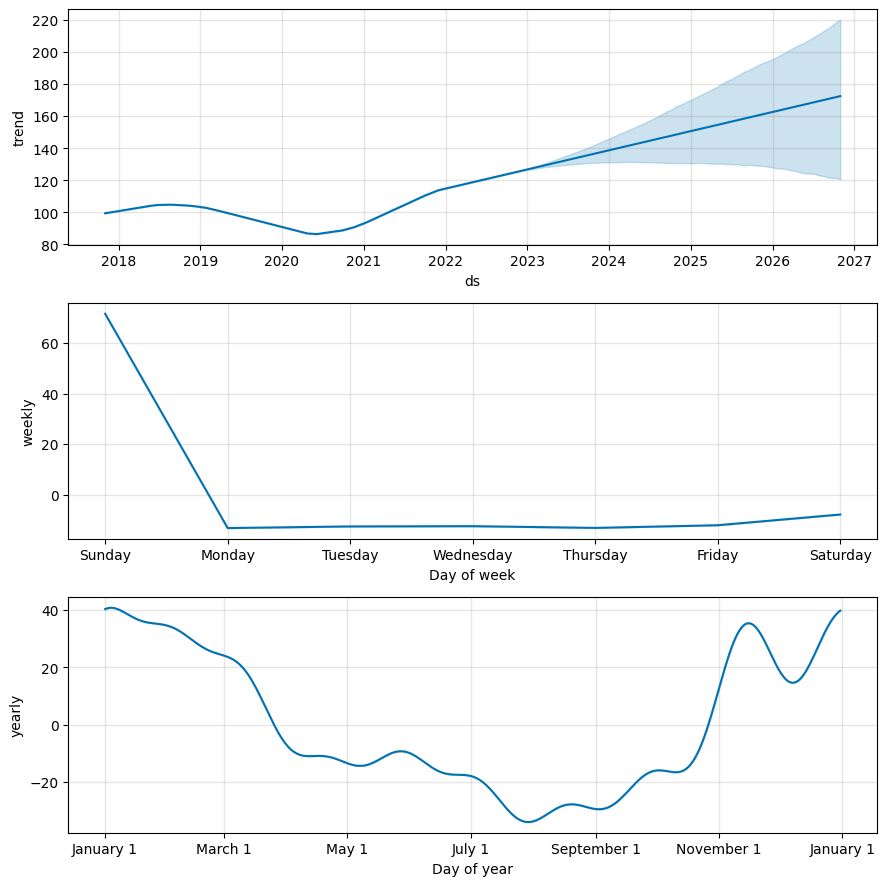

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)